<a href="https://colab.research.google.com/github/reb-scho/subsidies/blob/main/subsidies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis of the IEA Fossil Fuel Subsidies Database



To reduce enery prices, governments may subsidise fossil fuels (coal, oil, natural gas) and electricity generated by fossil fuels.

In the [Fossil Fuel Subsidies Database](https://www.iea.org/data-and-statistics/data-product/fossil-fuel-subsidies-database#), "the IEA estimates subsidies to fossil fuels that are consumed directly by end-users or consumed as inputs to electricity generation." The data currently covers 2010-2023.


In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/colab/subsidies/data/subsidies_raw.xlsx'

!wget https://raw.githubusercontent.com/reb-scho/subsidies/main/cleaning_data.py
from cleaning_data import load_and_clean

global_product_df, global_total_df, country_product_df, country_total_df = load_and_clean(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2025-08-06 14:35:21--  https://raw.githubusercontent.com/reb-scho/subsidies/main/cleaning_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3534 (3.5K) [text/plain]
Saving to: ‘cleaning_data.py’

cleaning_data.py    100%[===================>]   3.45K  --.-KB/s    in 0s      

2025-08-06 14:35:21 (42.5 MB/s) - ‘cleaning_data.py’ saved [3534/3534]



# 1. What are the global trends in fossil fuel subsidies, 2010-2023?

Dataframes:
* global_product_df
* global_elec_df
* global_fossil_df
* global_fossil_agg_df

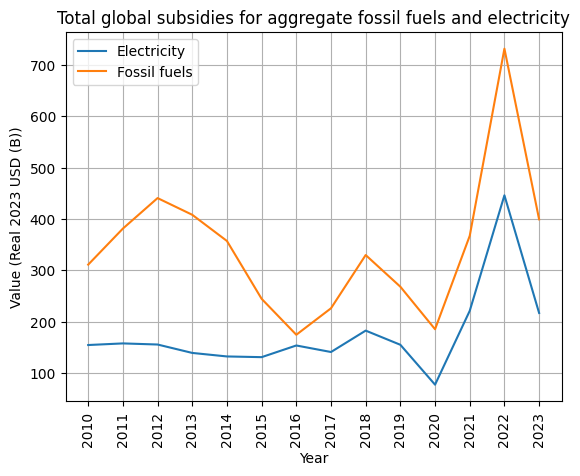

In [142]:
global_elec_df = global_product_df[global_product_df["Product"] == "Electricity"].copy()
global_fossil_df = global_product_df[global_product_df["Product"] != "Electricity"].copy()
global_fossil_agg_df = global_fossil_df.groupby("Year")["Value (B USD)"].sum().reset_index()

plt.plot(global_elec_df["Year"], global_elec_df["Value (B USD)"], label = "Electricity")
plt.plot(global_fossil_agg_df["Year"], global_fossil_agg_df["Value (B USD)"], label = "Fossil fuels")

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value (Real 2023 USD (B))")
plt.title("Total global subsidies for aggregate fossil fuels and electricity")
plt.grid()
plt.legend()
plt.show()


Line chart showing total subsidies for individual fossil fuels and electricity each year:

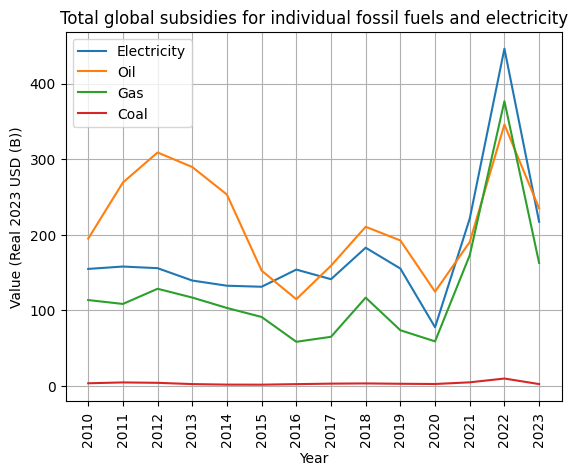

In [143]:
plt.plot(global_elec_df["Year"], global_elec_df["Value (B USD)"], label = "Electricity")

for product in global_fossil_df["Product"].unique():
  plot_df = global_fossil_df[global_fossil_df['Product'] == product]
  plt.plot(plot_df['Year'], plot_df['Value (B USD)'], label=product)

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value (Real 2023 USD (B))")
plt.title("Total global subsidies for individual fossil fuels and electricity")
plt.grid()
plt.legend()
plt.show()